# ***Binary Classification with Bank Churn Dataset***
### *`Author:`* *Muhammad Furqan*
### *[LinkedIn](https://www.linkedin.com/in/iammuhammadfurqan/)* 
### *[Github](https://github.com/iammuhammadfurqan)*
### *[Kaggle](https://www.kaggle.com/muhammadfurqan0)*
### *`Start Date:`* *23-01-2024*
### *`End Date:`* *24-01-2024*
### *`Dataset:`* *[Binary Classification with Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1)*

## AIM: *`We will classify that which customers who will stay in our bank or leave our bank with the help of Deep Learning(Neural Networks) Approach`*

## Dataset Description:

- `Customer ID`: A special number for each customer

- `Surname`: The customer's last name

- `Credit Score`: A number showing how good the customer is with money

- `Geography`: The country where the customer lives

- `Gender`: Whether the customer is a man or a woman

- `Age`: How old the customer is

- `Tenure`: How many years the customer has been with the bank

- `Balance`: How much money the customer has in their account

- `NumOfProducts`: How many bank things the customer uses, like savings or credit cards

- `HasCrCard`: If the customer has a credit card or not

- `IsActiveMember`: If the customer is actively using the bank services

- `EstimatedSalary`: An estimate of how much the customer earns

- `Exited`: If the customer has left the bank (this is what we want to find out)

In [52]:
# Import the Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

## Let's Explore the Data

In [53]:
# laod the datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

### Sneak Preview of Data

Achieve a rapid glimpse of your dataset with just one line of code! This convenient approach allows you to swiftly review the initial rows of your data, providing you with an instant grasp of the dataset's content without the need to scroll through the entire file.

In [54]:
# train dataset and exploration
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [55]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [56]:
df = df_train.copy()

### View Column Data Types

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### View Column Names

In [58]:
df.columns.values

array(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [59]:
# find and sum the null values
null_sum = df.isnull().sum().sort_values(ascending=False)
null_sum

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

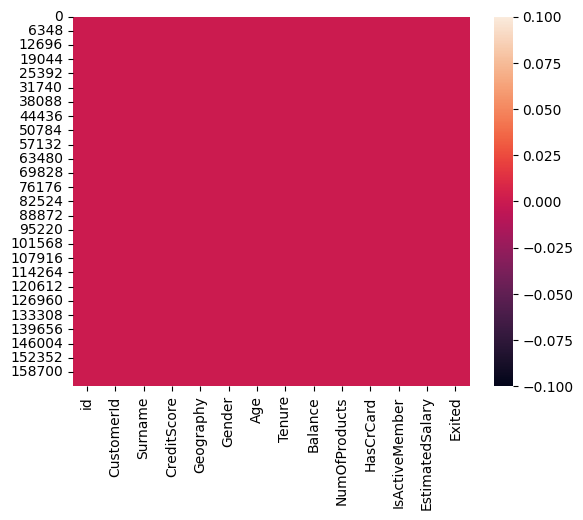

In [60]:
# find and plot the null values
sns.heatmap(df.isnull())
plt.show()

***`Figure-1:`*** From Figure we can easily see that there is no Missing/Null values in our Dataset

### Summary of Data Characteristics

Descriptive statistics are employed to succinctly summarize and gain insight into the fundamental characteristics of the dataset.

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [62]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the value counts of the categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



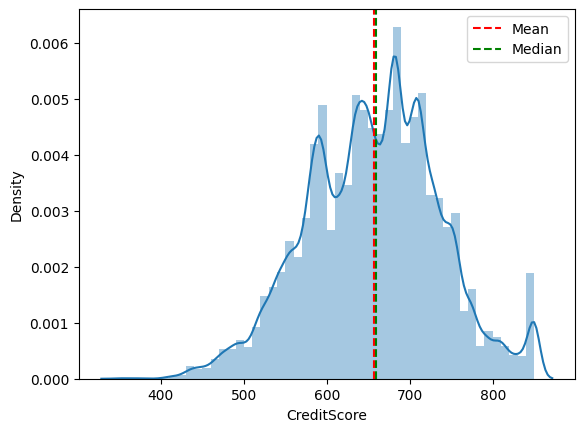

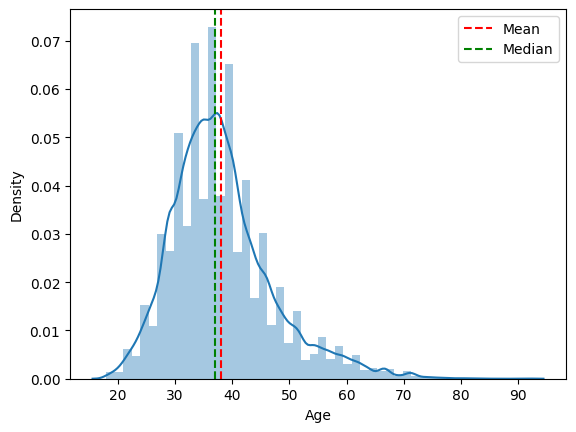

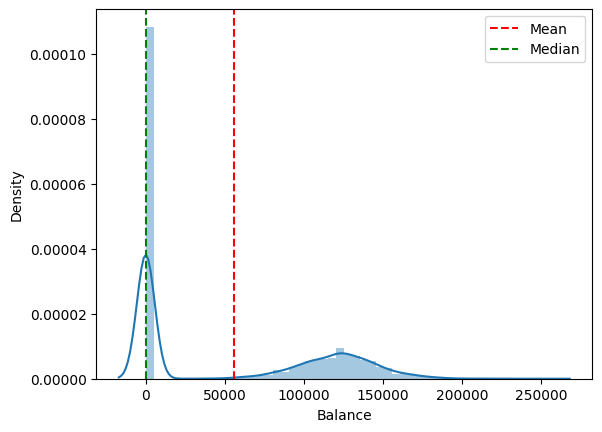

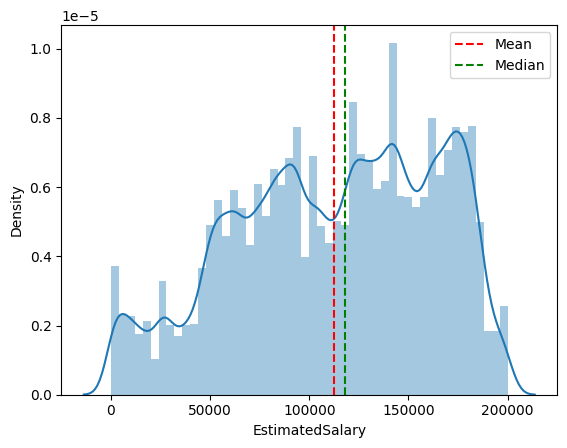

In [63]:
# create histogram of numerical columns using sns and kde=true
for col in num_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

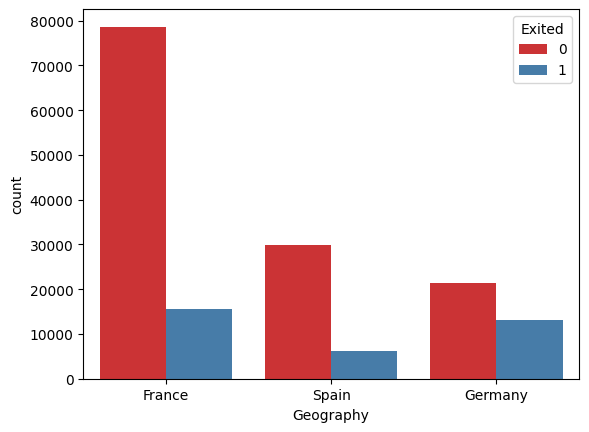

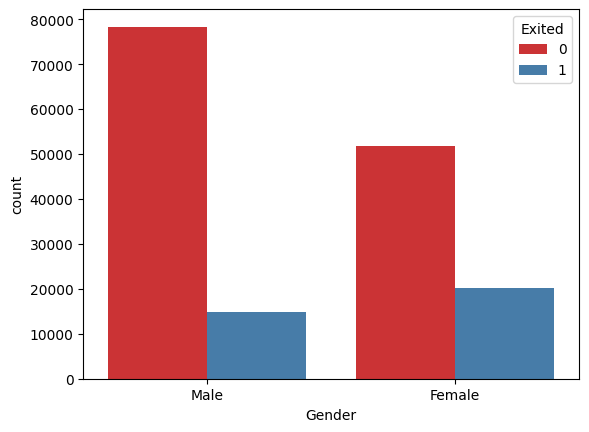

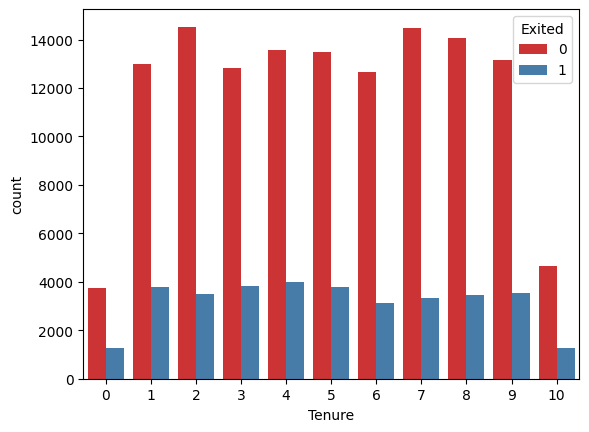

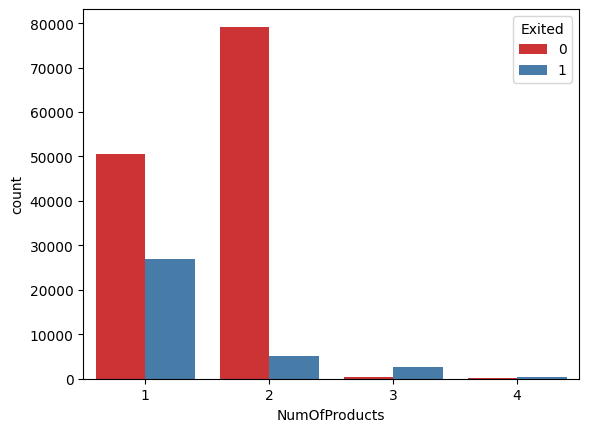

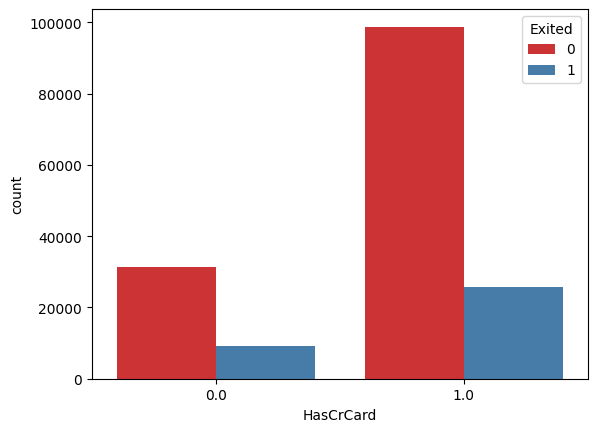

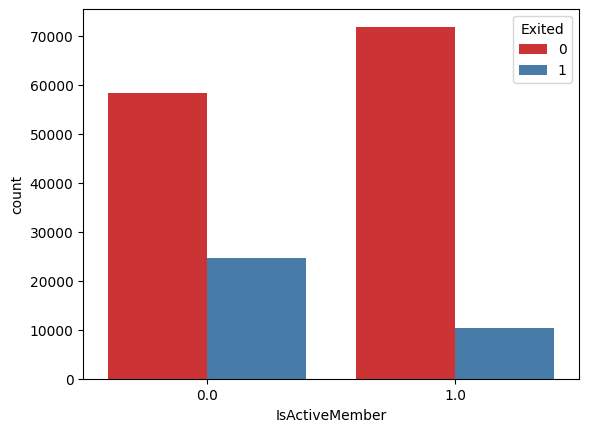

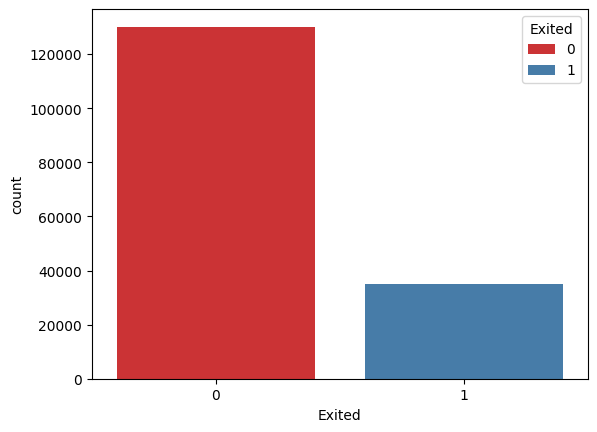

In [64]:
# create countplot of categorical columns using sns and hue with different colors
for col in cat_cols:
    sns.countplot(x=col, data=df, hue='Exited', palette='Set1')
    plt.show()

In [65]:
#print the shape of the dataframe to check the number of rows and columns with proper f'srting message
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 165034 rows and 14 columns.


### Encoded the Categorical Values by Using Label Encoder

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [69]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Drop Unecessary Columns

In [70]:
# split the data into X and y
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'] , axis=1)
y = df['Exited']

### Split our data into X and y

In [71]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)